<a href="https://colab.research.google.com/github/BalKrishna-Tiwari/Playstore-App-Analysis/blob/main/AppReviewAnalysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
# Importing all libraries which will be required in EDA

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import date
from datetime import timedelta

In [367]:
sns.set_style("dark")

In [216]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
# Importing datasets from Google drive for analysis

df1=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/Play Store Data.csv')
df2=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capston Project/Play store app/User Reviews.csv')

In [218]:
# Inspecting data set df1 for columns and values
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [220]:
# Function to convert Size of App into one unit that is MB and reflecting value as float
def extract_valueMB(cell_value):
  ''' To convert string numbers into integer and to decode MB value details '''
  try:
    if str(cell_value)[-1]=='M':
      return float(cell_value[:-1])
    elif str(cell_value)[-1]=='k':
      return float(cell_value[:-1])/1000
    else:     
      return float(cell_value)

  except: return cell_value  


In [221]:
# Applying extract MB function
df1['Size']=df1['Size'].apply(lambda x: extract_valueMB(x))

In [222]:
# Defining a function to standerdise number of reviews from million and k to integers
def extract_value(cell_value):
  ''' To convert string numbers into integer and to decode million value details '''
  try:
    if str(cell_value)[-1]=='M':
      return int(cell_value[:-1])*1000000
    elif str(cell_value)[-1]=='k':
      return int(cell_value[:-1])*1000
    else:     
      return int(cell_value)

  except: return cell_value

In [223]:
# Applying Extract value function to get number of reviews
df1['Reviews']=df1['Reviews'].apply(lambda x: extract_value(x))

In [224]:
# Cheking data set now
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [225]:
''' We can see in above inspection Reviews column has been standerdised in float but
Size is still of type object. Let us inspect this collumn for non float type objects
and try to standerdis same '''

' We can see in above inspection Reviews column has been standerdised in float but\nSize is still of type object. Let us inspect this collumn for non float type objects\nand try to standerdis same '

In [226]:
#Lets chek were size is not float
df1[~df1['Size'].apply(lambda x: isinstance(x, float))==True].head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device


In [227]:
# lets check if there is any other case of discripency in size except Varies with device case.
df1['Size'].unique()

array([19.0, 14.0, 8.7, 25.0, 2.8, 5.6, 29.0, 33.0, 3.1, 28.0, 12.0, 20.0,
       21.0, 37.0, 2.7, 5.5, 17.0, 39.0, 31.0, 4.2, 7.0, 23.0, 6.0, 6.1,
       4.6, 9.2, 5.2, 11.0, 24.0, 'Varies with device', 9.4, 15.0, 10.0,
       1.2, 26.0, 8.0, 7.9, 56.0, 57.0, 35.0, 54.0, 0.201, 3.6, 5.7, 8.6,
       2.4, 27.0, 2.5, 16.0, 3.4, 8.9, 3.9, 2.9, 38.0, 32.0, 5.4, 18.0,
       1.1, 2.2, 4.5, 9.8, 52.0, 9.0, 6.7, 30.0, 2.6, 7.1, 3.7, 22.0, 7.4,
       6.4, 3.2, 8.2, 9.9, 4.9, 9.5, 5.0, 5.9, 13.0, 73.0, 6.8, 3.5, 4.0,
       2.3, 7.2, 2.1, 42.0, 7.3, 9.1, 55.0, 0.023, 6.5, 1.5, 7.5, 51.0,
       41.0, 48.0, 8.5, 46.0, 8.3, 4.3, 4.7, 3.3, 40.0, 7.8, 8.8, 6.6,
       5.1, 61.0, 66.0, 0.079, 8.4, 0.118, 44.0, 0.695, 1.6, 6.2, 0.018,
       53.0, 1.4, 3.0, 5.8, 3.8, 9.6, 45.0, 63.0, 49.0, 77.0, 4.4, 4.8,
       70.0, 6.9, 9.3, 8.1, 36.0, 84.0, 97.0, 2.0, 1.9, 1.8, 5.3, 47.0,
       0.556, 0.526, 76.0, 7.6, 59.0, 9.7, 78.0, 72.0, 43.0, 7.7, 6.3,
       0.334, 34.0, 93.0, 65.0, 79.0, 100.0, 58.0, 50

In [228]:
# There is a case were value is 1000+, lets chek the same
df1[df1['Size']=='1,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [229]:
# There is only one such case which appeares to be wrongly mentioned. We can drop this case from our dataset
df1.drop(10472, axis=0, inplace=True)

In [230]:
# Cheking install values
df1['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [231]:
# Converting installation details into numbers by mapping dictionary
Instalation_dict={'10,000+':10000, '500,000+':500000, '5,000,000+':5000000, '50,000,000+':50000000,
 '100,000+':100000, '50,000+':50000, '1,000,000+':1000000, '10,000,000+':10000000, '5,000+':5000,
 '100,000,000+':100000000, '1,000,000,000+':1000000000, '1,000+':1000, '500,000,000+':500000000,
 '50+':50, '100+':100, '500+':500, '10+':10, '1+':1, '5+':5, '0+':1, '0':0}

''' Implementing values as per dictionary in new data frame. Ans since no null value available in this colum
we can relie on dictionary directly '''

df1['Installs']=df1['Installs'].apply(lambda x: Instalation_dict[x])

In [232]:
# Inspecting Installs cloumn
df1['Installs'].dtype

dtype('int64')

In [233]:
# Inspecting and standerdising price column
df1['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [234]:
def extract_price(price):
  """ Give price prefixed as doller sign and the function will convert it into flat value """
  if len(price)==1:
    try: return float(price)
    except: return 0

  elif len(price)>1 and price[0]=='$':
    try: return float(price[1:])
    except: 0  

In [235]:
# Implimenting extract price function on price column of dataframe
df1['Price']=df1['Price'].apply(lambda x: extract_price(x))

In [236]:
df1['Price'].dtype

dtype('float64')

In [237]:
# Inspecting and standerdising Android Version Column
df1['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [238]:
# For standerdisation purpose let us considered main version of android (lowes version) that can be used to run app.
def extract_lowest_android_2dig_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    elif version_range=='Varies with device':
      return 'Varies with device'
    else:
      return float(x[0])
    
  except:
   return version_range

In [239]:
# Implimenting extract version function on android version column of dataframe
df1['Android Ver2']=df1['Android Ver'].apply(lambda x: extract_lowest_android_2dig_version(x))

In [240]:
df1['Android Ver2'].unique()

array([4.0, 2.0, 3.0, 'Varies with device', 5.0, 6.0, 1.0, 7.0, 8.0, nan],
      dtype=object)

In [241]:
''' Note that there are two kinds of different data nan and Varies with devices. There can be no app
that will not be associated with android version, hence chek number of such app in list, and remove them if
number of app is small '''

' Note that there are two kinds of different data nan and Varies with devices. There can be no app\nthat will not be associated with android version, hence chek number of such app in list, and remove them if\nnumber of app is small '

In [242]:
df1[df1['Android Ver2'].isnull()]['App'].count()

2

In [243]:
# Thus there are two such rows which need to be removed from our data set
df1=df1[~df1['Android Ver2'].isnull()]

In [244]:
# Checking and standerdising Last update column
df1['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [245]:
type(df1['Last Updated'][1])

str

In [246]:
""" Last update columns contain date in form of string. Inorder to make it in standered format we need to convert it into Date format
As all the values given in last updated column is string and none is null value. 
We can recall strip time method to decode string into time. """

df1['Last Updated']=df1['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))

In [247]:
# On same principle of Android version we can chek and modify current version of app
df1['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [248]:
def extract_app_version(version_range):
  """ This function will deal with given version and range and extract info about lowest version required to run the app"""
  try:
    x=version_range.split('.')
    if version_range==np.nan:
      return 'No data available'
    else:
      return float(x[0])
    
  except:
   return 'Undecodable'

In [249]:
# Implimenting extract version function on android version column of dataframe
df1['App Ver2']=df1['Current Ver'].apply(lambda x: extract_app_version(x))

In [250]:
df1['App Ver2'].unique()

array([1.0, 2.0, 'Undecodable', 6.0, 3.0, 5.0, 4.0, 11.0, 0.0, 8.0, 10.0,
       18.0, 9.0, 15.0, 14.0, 7.0, 99.0, 12.0, 37.0, 24.0, 47.0, 69.0,
       42.0, 196.0, 2018.0, 20.0, 13.0, 43.0, 16.0, 112.0, 220.0, 858.0,
       3196.0, 5423.0, 19.0, 13993.0, 79.0, 108.0, 57.0, 60.0, 149.0,
       37893.0, 20180609.0, 28.0, 25.0, 300000.0, 50.0, 27.0, 29.0, 584.0,
       22.0, 71.0, 1004.0, 2017.0, 17.0, 53.0, 32.0, 20180517.0, 40.0,
       68.0, 30.0, 116.0, 27500000.0, 5055.0, 31.0, 1009001.0, 1900001.0,
       23.0, 1805.0, 263.0, 65.0, 1255162018.0, 117.0, 132.0, 10001008.0,
       18060104.0, 568.0, 39.0, 666.0, 20180608.0, 20180620.0, 250.0,
       26.0, 35.0, 106.0, 102.0, 70.0, 41.0, 202.0, 48.0, 2014.0, 200.0,
       3000.0, 20180805.0, 700.0, 20170828.0, 67.0, 33.0, 4541.0, 130.0,
       25072018.0, 56.0, 21.0, 314007.0, 1000000.0, 36.0, 81.0, 176.0,
       60816.0, 125.0, 34.0, 20170920.0], dtype=object)

In [251]:
df1[df1['App Ver2']=='Undecodable']['App'].count()

1623

In [252]:
df1[df1['App Ver2']=='No data available']['App'].count()

0

In [253]:
# As we can see there is lots of misleading or oddness within data it will be better if we exclude this column from our analysis

In [254]:
# Hence dropping this stander column
df1.drop(['App Ver2'], axis=1, inplace=True)

In [255]:
# Standerdising data in reviews column
df1['Reviews'].unique()

array([159, 967, 87510, ..., 603, 1195, 398307], dtype=object)

In [256]:
# It appears all data is numeric, but dtype shows object, lets convert it into numeric
df1['Reviews']=df1['Reviews'].apply(pd.to_numeric)

In [257]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10838 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10838 non-null  object        
 1   Category        10838 non-null  object        
 2   Rating          9364 non-null   float64       
 3   Reviews         10838 non-null  int64         
 4   Size            10838 non-null  object        
 5   Installs        10838 non-null  int64         
 6   Type            10837 non-null  object        
 7   Price           10838 non-null  float64       
 8   Content Rating  10838 non-null  object        
 9   Genres          10838 non-null  object        
 10  Last Updated    10838 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Android Ver2    10838 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)


In [258]:
# There are multiple genres on app, we need to extract prime genres for each and consider it for analysis
df1['Prime_Genres']=df1['Genres'].apply(lambda x: x.split(';')[0])

In [259]:
# Revenue of Installation from paid App
df1['Installation_Revenue']=df1['Price']*df1['Installs']

In [260]:
""" Excluding invalid data from data frame """

' Excluding invalid data from data frame '

In [261]:
# Checking for App were rating is greater then 5 or less then 1
No_of_Records_with_Rating_below_1=df1[df1['Rating']<1]['App'].count()
No_of_Records_with_Rating_above_5=df1[df1['Rating']>5]['App'].count()
No_of_Records_with_null_Rating=df1[df1['Rating'].isnull()]['App'].count()
print("Numer of records with\nNo Rating: {}\nRating above 5: {}\nRating below 1: {}".format(No_of_Records_with_null_Rating,
                                                                                            No_of_Records_with_Rating_above_5,
                                                                                            No_of_Records_with_Rating_below_1))

Numer of records with
No Rating: 1474
Rating above 5: 0
Rating below 1: 0


In [262]:
''' There are 1474 Records with no rating this is huge number, we should not be 
excluding it as there may be app with no rating given, but there are cases were 
review is given but rating is not, such cases should not happen '''
df1[df1['Rating'].isnull() & df1['Reviews']>0]['App'].count()

506

In [263]:
''' There are 878 Records where Rating is null but Review is greter then 0. We need to drop such
cases as they appears to be misleading data '''
df1=df1[~((df1['Rating'].isnull()) & (df1['Reviews']>0))]

In [264]:
''' Let us check the cases were No of installs are less then review, such cases are again contains error '''
df1[df1['Reviews']>df1['Installs']]['App'].count()

7

In [265]:
# There are only 7such cases we neet to remove them from our data frame.

df1=df1[~(df1['Reviews']>df1['Installs'])]

In [266]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9953 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   App                   9953 non-null   object        
 1   Category              9953 non-null   object        
 2   Rating                9357 non-null   float64       
 3   Reviews               9953 non-null   int64         
 4   Size                  9953 non-null   object        
 5   Installs              9953 non-null   int64         
 6   Type                  9952 non-null   object        
 7   Price                 9953 non-null   float64       
 8   Content Rating        9953 non-null   object        
 9   Genres                9953 non-null   object        
 10  Last Updated          9953 non-null   datetime64[ns]
 11  Current Ver           9948 non-null   object        
 12  Android Ver           9953 non-null   object        
 13  Android Ver2     

In [267]:
# Cheking for duplicacy in App name and removing duplicate entries. Lets check them by passing unique function on App name
len(list(df1['App'].unique()))

8780

In [268]:
df1['App'].count()

9953

In [269]:
(df1['App'].count()-len(list(df1['App'].unique())))/len(list(df1['App'].unique()))

0.1335990888382688

In [270]:
#Nearly 13.35% Records are repeated till this point after rectification
#We need to study deeper as number of repeatations are huge

In [271]:
df1[(df1['App'].duplicated()==True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,Prime_Genres,Installation_Revenue
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,Business,0.0
236,Box,BUSINESS,4.2,159872,Varies with device,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,Varies with device,Business,0.0
239,Google My Business,BUSINESS,4.4,70991,Varies with device,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,4.0,Business,0.0
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,4.0,Business,0.0
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,4.0,Business,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,4.0,Dating,0.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,5.0,Communication,0.0
10730,FP Notebook,MEDICAL,4.5,410,60.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,4.0,Medical,0.0
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,4.0,Shopping,0.0


In [272]:
# Analysisng first case for difference
df1[(df1['App'].duplicated()==True) & (df1['App']=='Quick PDF Scanner + OCR FREE')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,Prime_Genres,Installation_Revenue
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,Business,0.0
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,Business,0.0


In [273]:
# Since there is no relation between duplicacy and nan values, its easy to remove duplicate value based on duplicacy in each row.
df1.drop_duplicates(inplace=True)

In [274]:
# Check if duplicates still exist based on name?
df1[(df1['App'].duplicated()==True)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,Prime_Genres,Installation_Revenue
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,4.0,Business,0.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35.0,100000000,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,4.0,Business,0.0
294,Slack,BUSINESS,4.4,51510,Varies with device,5000000,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,Varies with device,Business,0.0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,Varies with device,Communication,0.0
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11.0,500000000,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,4.0,Communication,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,100000000,Free,0.0,Everyone,Video Players & Editors,2018-05-02,Varies with device,Varies with device,Varies with device,Video Players & Editors,0.0
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,4.0,Dating,0.0
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,5.0,Communication,0.0
10730,FP Notebook,MEDICAL,4.5,410,60.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,4.0,Medical,0.0


In [275]:
df1[(df1['App'].duplicated()==True) & (df1['App']=='PJ Masks: Moonlight Heroes')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,Prime_Genres,Installation_Revenue
9440,PJ Masks: Moonlight Heroes,FAMILY,4.4,87045,99.0,10000000,Free,0.0,Everyone,Casual;Action & Adventure,2018-06-05,2.0.1,4.0.3 and up,4.0,Casual,0.0


In [276]:
dummy_series=df1.groupby(['App']).agg({'Category':'count'}).sort_values(by='Category',ascending=True)

In [277]:
dummy_series[dummy_series['Category']>1]

,Category
App,
Google,2
PAC-MAN,2
"Z Camera - Photo Editor, Beauty Selfie, Collage",2
Google PDF Viewer,2
CW Seed,2
...,...
Zombie Catchers,6
Bubble Shooter,6
Helix Jump,6


In [278]:
df1[(df1['App']=='ROBLOX')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android Ver2,Prime_Genres,Installation_Revenue
1653,ROBLOX,GAME,4.5,4447388,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,Adventure,0.0
1701,ROBLOX,GAME,4.5,4447346,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,Adventure,0.0
1748,ROBLOX,GAME,4.5,4448791,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,Adventure,0.0
1841,ROBLOX,GAME,4.5,4449882,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,Adventure,0.0
1870,ROBLOX,GAME,4.5,4449910,67.0,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up,4.0,Adventure,0.0


In [279]:
''' Thus actually the columns may be duplicated by name but there may be different value of rows.
Thus we have to except one of the duplicate or else should remove them all. 
We will again use drop duplicate based on column name only and keeping first occourence after
sorting Rating values that contain nan values too, so that nan value should be removed first'''
df1.sort_values('Rating', ascending=False, inplace=True)
df1.drop_duplicates(subset='App', keep='first', inplace=True)

In [280]:
# Shape 8780 is what we require to standerdise our data
df1.shape

(8780, 16)

In [281]:
# There are multiple genres on app, we need to extract prime genres for each and consider it for analysis
df1['Prime_Genres']=df1['Genres'].apply(lambda x: x.split(';')[0])

In [282]:
''' Categorising App based on data value span '''

' Categorising App based on data value span '

In [283]:
df1.describe()

,Rating,Reviews,Installs,Price,Installation_Revenue
count,8187.000000,8.780000e+03,8.780000e+03,8780.000000,8.780000e+03
mean,4.172823,2.383715e+05,8.570432e+06,1.148969,3.314350e+04
std,0.536155,1.919058e+06,5.633652e+07,17.614137,9.141993e+05
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,6.200000e+01,5.000000e+03,0.000000,0.000000e+00
50%,4.300000,1.987500e+03,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,3.758975e+04,1.000000e+06,0.000000,0.000000e+00
max,5.000000,7.812821e+07,1.000000e+09,400.000000,6.990000e+07


In [284]:
'''
From describe result and data frame heads we can categorise dataframe into below categories
1. Very High Review, High Revieu, Medium Review, Low Review, Very Low Review
2. Update Year, Update Month
3. App Size High, Medium, Low
'''

'\nFrom describe result and data frame heads we can categorise dataframe into below categories\n1. Very High Review, High Revieu, Medium Review, Low Review, Very Low Review\n2. Update Year, Update Month\n3. App Size High, Medium, Low\n'

In [285]:
def extract_Review(Review_Count):
  """ This function will take Reviw count in numbers and categorise it into High, Medium, Low range """
  try:
    if Review_Count>4e6:
      return 'Very High'
    elif Review_Count>4e4:
      return 'High'
    elif Review_Count>1e3:
      return 'Medium'
    elif Review_Count>7e1:
      return 'Low'
    elif Review_Count>=0:
      return 'Very Low'
  except:
    return 'Undecoded'      

In [286]:
df1['Review Category']=df1['Reviews'].apply(lambda x: extract_Review(x))

In [287]:
def extract_Size(Size):
  """ This function will take Size in number of MB and categorise it into High, Medium, Low range """
  try:
    if Size=='Varies with device':
      return 'Varies with device'
    elif Size>70:
      return 'Very High'
    elif Size>30:
      return 'High'  
    elif Size>5:
      return 'Medium'
    elif Size>2:
      return 'Low'
    elif Size>=0:
      return 'Very Low'
  except:
    return 'Undecoded'

In [288]:
df1['Size Category']=df1['Size'].apply(lambda x: extract_Size(x))

In [289]:
def extract_Rating_Cat(Rating):
  """ This function will take Size in number of MB and categorise it into High, Medium, Low range """
  try:
    if Rating>4.5:
      return '4.5+'
    elif Rating>4:
      return '4+'
    elif Rating>3:
      return '3+'  
    elif Rating>2:
      return '2+'
    else:
      return '1+'
  except:
    return 'Undecoded'

In [290]:
df1['Rating Category']=df1['Rating'].apply(lambda x: extract_Rating_Cat(x))

In [291]:
# Extract month and year of update
df1['Update_Month']=df1['Last Updated'].dt.strftime('%B')
df1['Update_Year']=df1['Last Updated'].dt.year

In [292]:
""" Standerdising df2 """

' Standerdising df2 '

In [293]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [294]:
'''
From df2 info we know that there are 64295 Number of details were review is not 
available such cases need not be analysed and hence should be excluded from df2.
Also there are some cases were Translated review is null but sentiment details 
are given, such cases should also be excluded from df2
'''

df2=df2[~df2['Translated_Review'].isnull()]

In [295]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [296]:
# All other data are ok and need no standerdisation

In [297]:
#Merging two data for final Review analysis
df3=pd.merge(df2, df1, how='left', on='App')

In [298]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 37426
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   App                     37427 non-null  object        
 1   Translated_Review       37427 non-null  object        
 2   Sentiment               37427 non-null  object        
 3   Sentiment_Polarity      37427 non-null  float64       
 4   Sentiment_Subjectivity  37427 non-null  float64       
 5   Category                35929 non-null  object        
 6   Rating                  35929 non-null  float64       
 7   Reviews                 35929 non-null  float64       
 8   Size                    35929 non-null  object        
 9   Installs                35929 non-null  float64       
 10  Type                    35929 non-null  object        
 11  Price                   35929 non-null  float64       
 12  Content Rating          35929 non-null  object

In [299]:
''' EDA of App Data '''

' EDA of App Data '

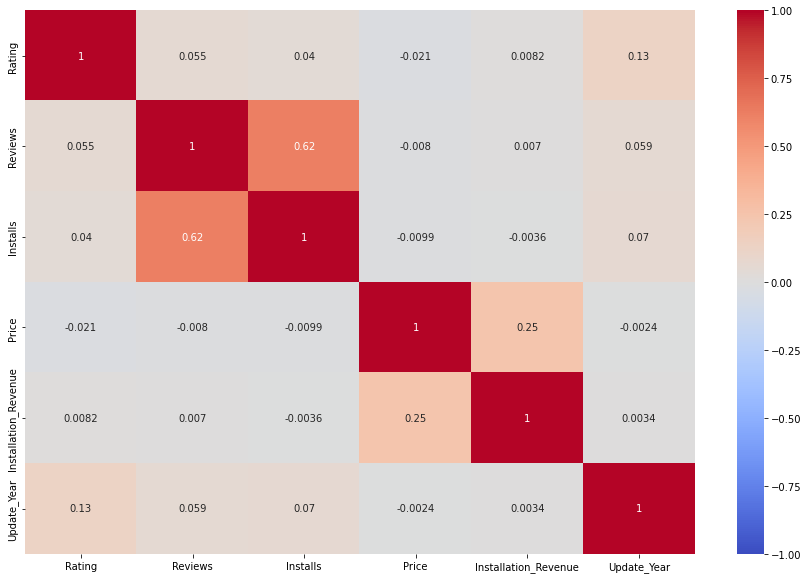

In [300]:
# Finding corelation between various data in df1
Corr=df1

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

In [301]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

In [302]:
df1['Size'].unique()

array([20.0, 0.055, 9.2, 4.2, 8.2, 38.0, 10.0, 31.0, 35.0, 5.6, 40.0,
       43.0, 15.0, 52.0, 13.0, 'Varies with device', 1.2, 9.4, 49.0, 2.4,
       4.7, 25.0, 1.4, 46.0, 8.8, 0.154, 0.655, 96.0, 28.0, 18.0, 5.9,
       2.7, 37.0, 1.6, 11.0, 4.8, 17.0, 3.2, 0.775, 27.0, 60.0, 2.3, 4.3,
       24.0, 2.5, 23.0, 3.8, 74.0, 3.7, 9.3, 3.1, 3.9, 1.5, 68.0, 12.0,
       0.683, 4.0, 94.0, 1.7, 1.3, 33.0, 22.0, 63.0, 0.169, 7.5, 50.0,
       14.0, 2.8, 4.1, 5.0, 8.1, 6.3, 5.5, 2.6, 4.6, 4.4, 83.0, 53.0,
       29.0, 0.5, 7.4, 5.8, 1.8, 7.1, 73.0, 26.0, 6.1, 5.4, 7.8, 2.0, 7.9,
       3.0, 6.2, 6.6, 64.0, 2.1, 70.0, 30.0, 3.6, 8.3, 19.0, 2.9, 59.0,
       8.7, 69.0, 3.4, 2.2, 16.0, 3.3, 61.0, 6.0, 7.2, 3.5, 4.5, 21.0,
       9.1, 8.6, 1.1, 8.4, 5.7, 6.7, 0.861, 66.0, 4.9, 56.0, 0.334, 48.0,
       7.0, 76.0, 67.0, 5.3, 0.516, 7.6, 0.608, 9.6, 8.0, 89.0, 44.0,
       57.0, 6.9, 1.9, 55.0, 5.1, 8.9, 54.0, 1.0, 78.0, 42.0, 9.8, 39.0,
       87.0, 86.0, 5.2, 62.0, 6.8, 7.7, 0.619, 9.7, 6.4, 6.5, 8

In [303]:
# Size and Android Version can be converted into numeric if there string values are excluded
dff1=df1[df1['Android Ver2']!='Varies with device']
dff1=dff1[dff1['Size']!='Varies with device']

In [304]:
dff1[['Size', 'Android Ver2']] = dff1[['Size', 'Android Ver2']].apply(pd.to_numeric)

In [305]:
dff1['Android Ver2'].unique()

array([4., 2., 1., 3., 5., 8., 7., 6.])

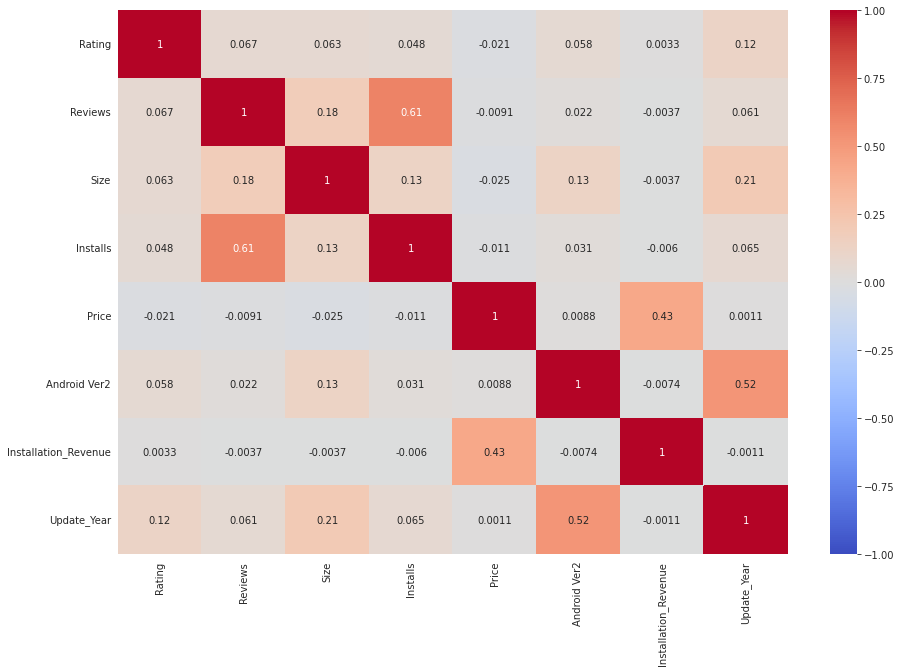

In [368]:
Corr=dff1

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

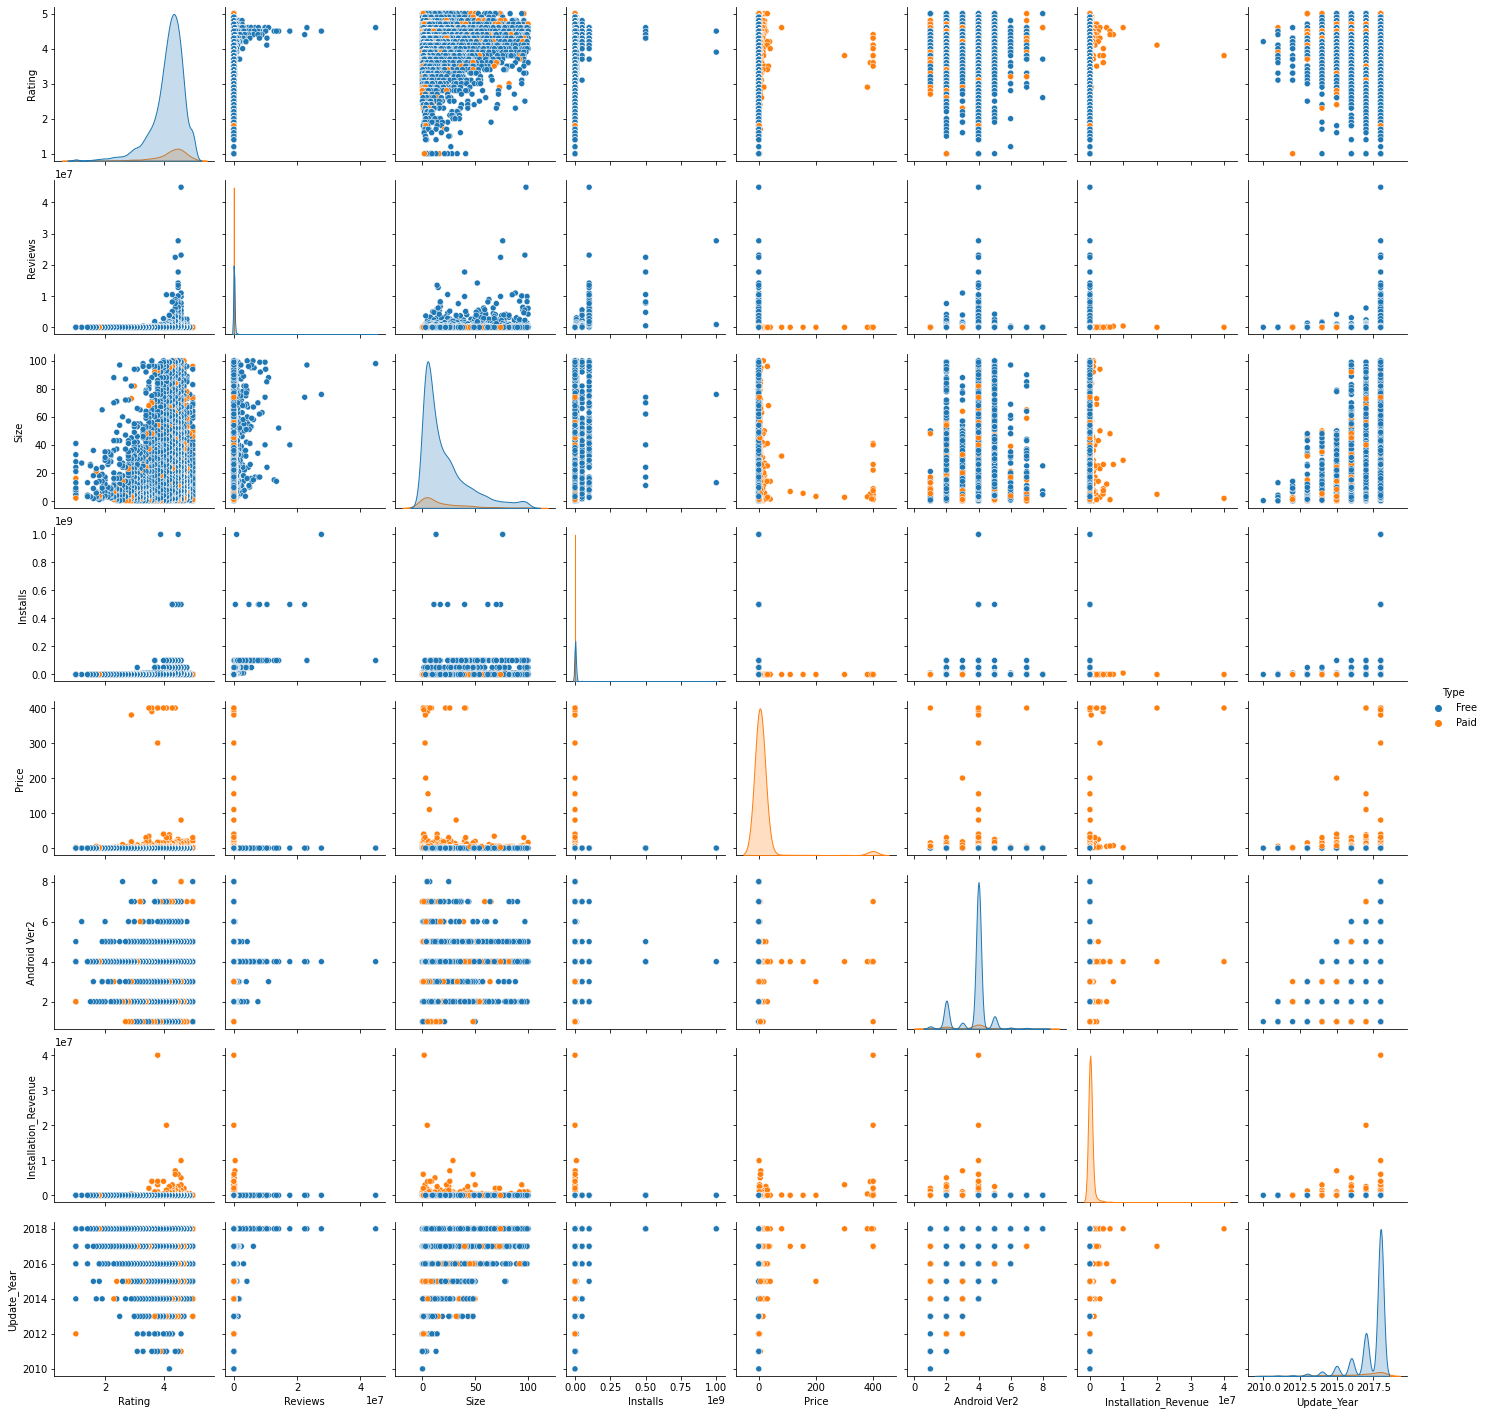

In [307]:
# Categorical analysis
sns.pairplot(dff1, hue="Type")

In [308]:
# Applying thease details for Review data too
dff2=df3[df3['Android Ver2']!='Varies with device']
dff2=dff2[dff2['Size']!='Varies with device']

In [309]:
dff2[['Size', 'Android Ver2']] = dff2[['Size', 'Android Ver2']].apply(pd.to_numeric)

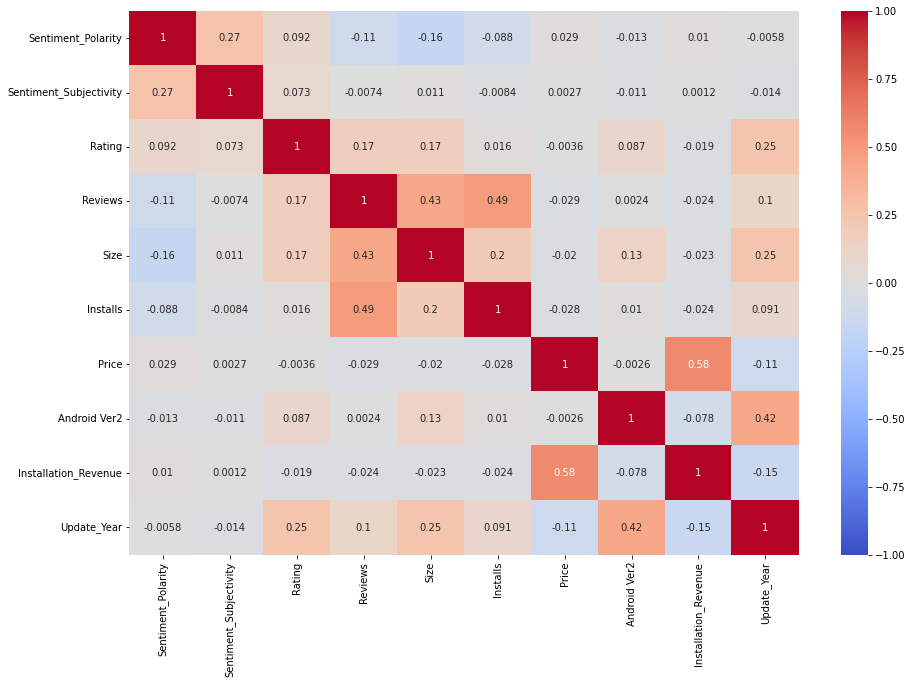

In [310]:
Corr=dff2

corr_df = Corr.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

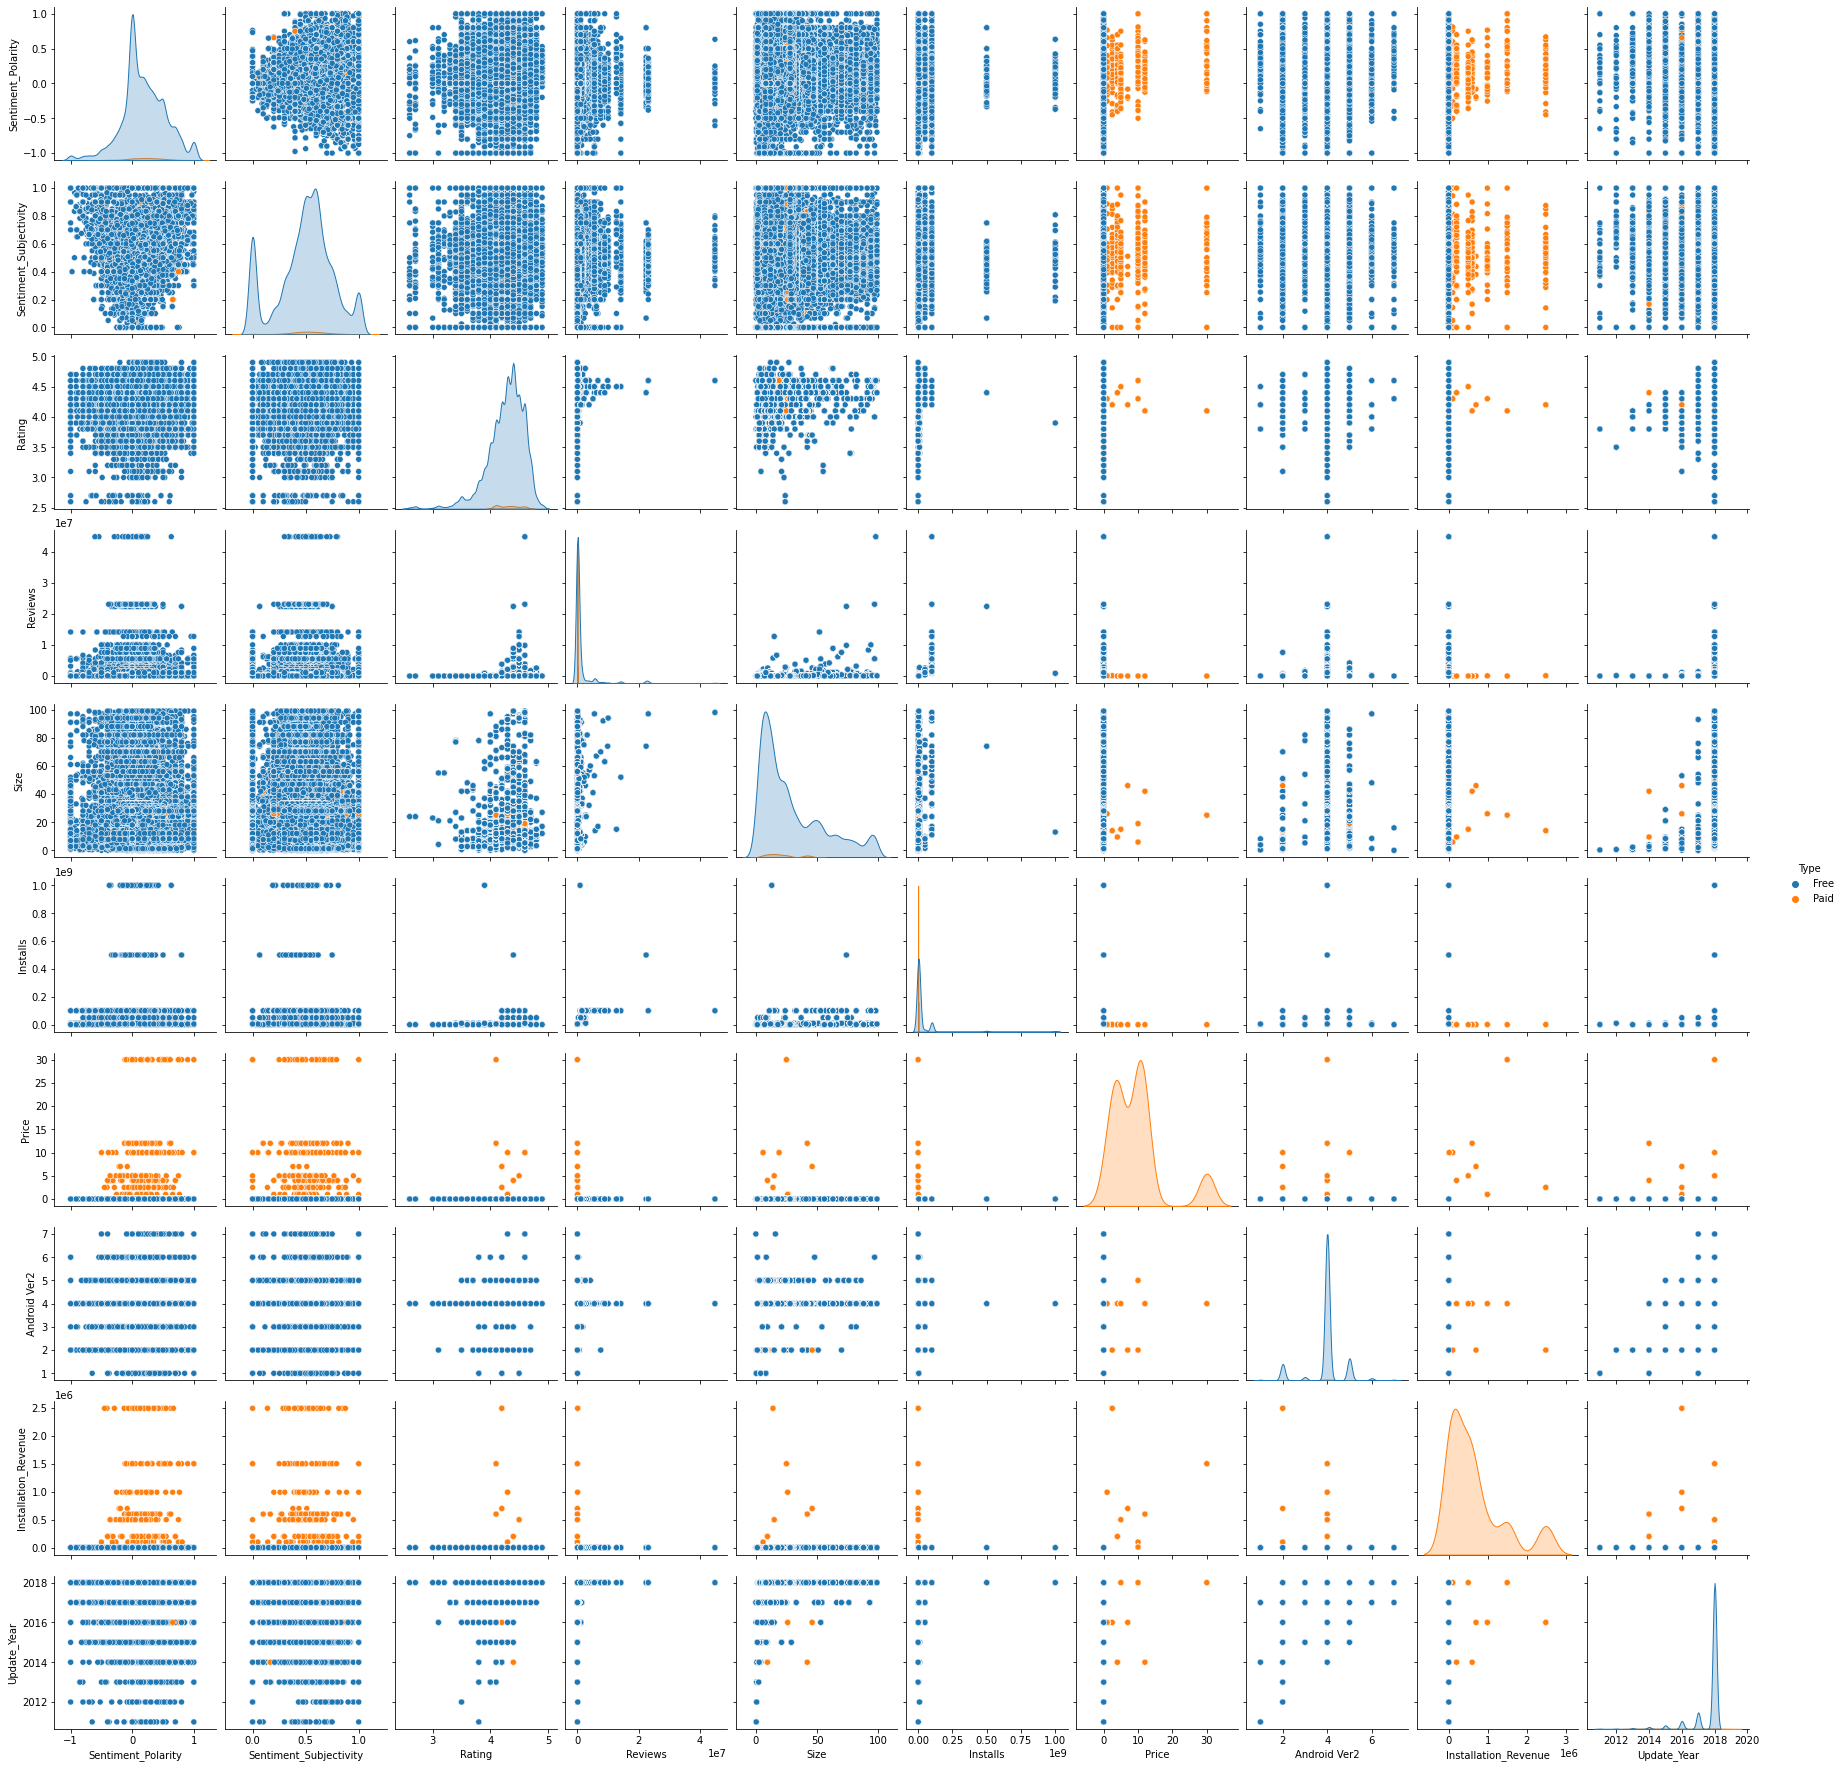

In [311]:
# Categorical analysis
sns.pairplot(dff2, hue="Type")

In [312]:
"""
We note that allthough analysis above has given us bigger picture about how data 
is linked with each other. We still need to mine in to extract detais about how 
variables are dependent.
We Now have below finalised dataframe to be analysed
1. df1 as details of all unique App
2. df3 as details of review with App details merged on it
"""

'\nWe note that allthough analysis above has given us bigger picture about how data \nis linked with each other. We still need to mine in to extract detais about how \nvariables are dependent.\nWe Now have below finalised dataframe to be analysed\n1. df1 as details of all unique App\n2. df3 as details of review with App details merged on it\n'

In [313]:
''' Analysing App details '''

' Analysing App details '

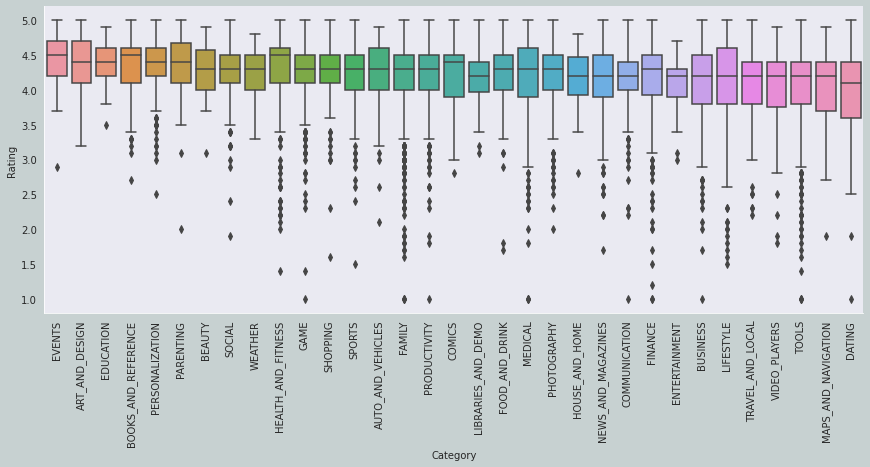

In [395]:
# Rating Vs Category
# Let us first chek on category for rating beein given to them

#Find list of Category based on order of average rating
Cat_Vs_Rating=df1.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
Cat_Vs_Rating.sort_values('Rating',ascending=False,inplace=True)
Cat_Order=list(Cat_Vs_Rating['Category'])

#Ploting
ax=sns.catplot(data=df1, x="Category", y="Rating", kind="box", order=Cat_Order, height=5, aspect=2.5)  #For controlling higher level API figsize will not work.
ax.set_xticklabels(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


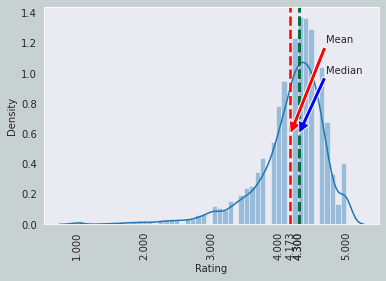

In [396]:
# Cheking if rating is normally distributed

Rating=df1[~df1['Rating'].isna()]['Rating']
ax=sns.distplot(Rating, hist=True)
plt.axvline(x=Rating.median(),color='blue',ls='--', lw=2.5)
plt.axvline(x=Rating.mean(),color='red',ls='--', lw=2.5)
plt.axvline(x=float(Rating.mode()),color='green',ls='--', lw=2.5)
plt.xticks([1,2,3,4,5,Rating.mean(),float(Rating.mode()),Rating.median()], rotation=90)
ax.annotate('Mean', xy=(Rating.mean(),0.6), xytext=(4.7,1.2), 
                  arrowprops=dict(facecolor='red', shrink=1))
ax.annotate('Median', xy=(Rating.median(),0.6), xytext=(4.7,1.0), 
                  arrowprops=dict(facecolor='blue', shrink=1))

plt.gcf().set_facecolor('#c7d1d1')

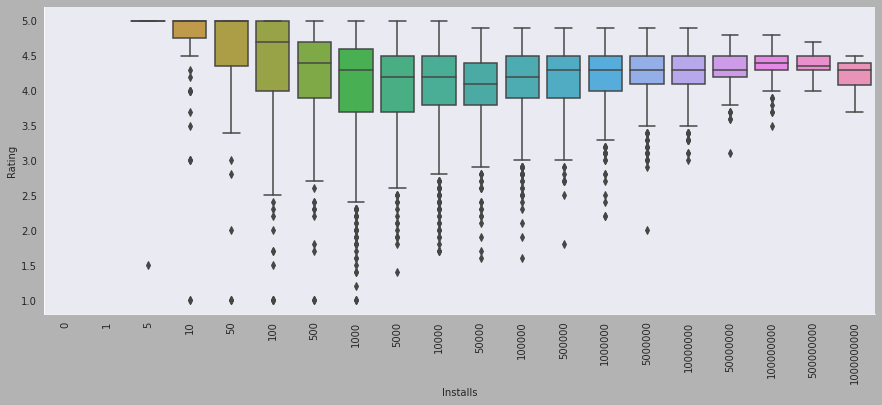

In [375]:
''' At categori level it is evident that most cases have high rating, this can be influenced by 
high number of installs hence we should chek if a perticular rating increases based on number of instlls or reviews 
category or not'''
# Rating Vs Number of installation
ax=sns.catplot(data=df1, x="Installs", y="Rating", kind="box", height=5, aspect=2.5)
ax.set_xticklabels(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

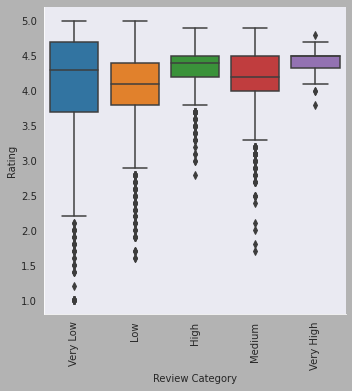

In [376]:
# Rating Vs Number of installation
ax=sns.catplot(data=df1, x='Review Category', y="Rating", kind="box", height=5, aspect=1)
ax.set_xticklabels(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

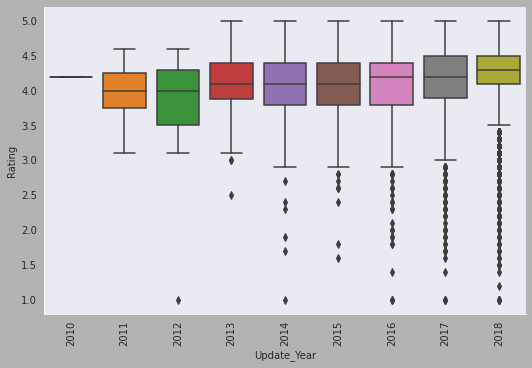

In [377]:
# Rating Vs Year of update
ax=sns.catplot(data=df1, x='Update_Year', y="Rating", kind="box", height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

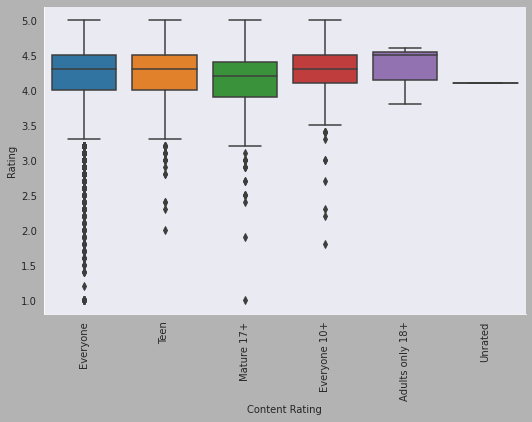

In [378]:
# Rating Vs Content Type of App
ax=sns.catplot(data=df1, x='Content Rating', y="Rating", kind="box", height=5, aspect=1.5)
ax.set_xticklabels(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

In [320]:
''' App and Its Category '''

' App and Its Category '

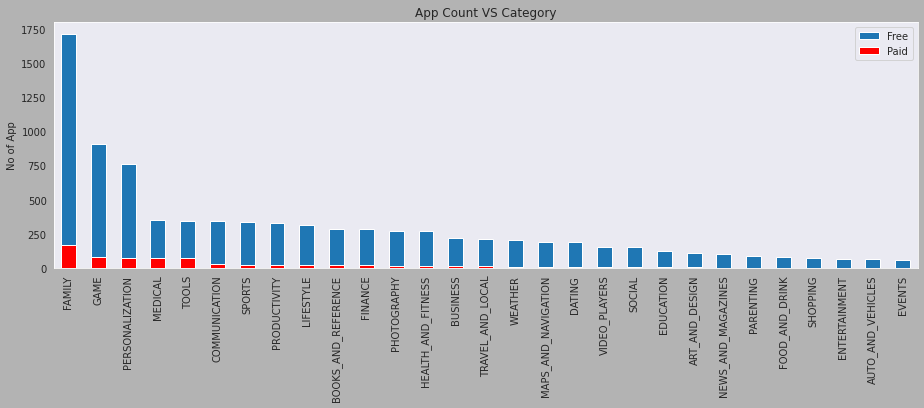

In [379]:
# No of app in market and its analysis with app being free or paid

# Sum of app count vs category
Cat_Vs_Count=df1.groupby(['Category'], as_index=False).agg({'App':'count'})
Cat_Vs_Count.sort_values('App',ascending=False,inplace=True)

final_df2=df1[df1['Type']=='Paid']
Cat_Vs_Count2=final_df2.groupby(['Category'], as_index=False).agg({'App':'count'})
Cat_Vs_Count2.sort_values('App',ascending=False,inplace=True)

# Fixing subplot frames
ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)

# Adjusting subplot windows
plt.subplots_adjust(left=0.00,
                    bottom=0.00,
                    right=1,
                    top=1,
                    wspace=.1,
                    hspace=.7)

#Plotting
Cat_Vs_Count.plot.bar(x='Category', y='App', rot=90, ax=ax1, figsize=(12,15))
Cat_Vs_Count2.plot.bar(x='Category', y='App', rot=90, ax=ax1, color='r')
ax1.set_ylabel('No of App')
ax1.set_xlabel('')
ax1.set_title('App Count VS Category')
ax1.legend(['Free', 'Paid'])

plt.gcf().set_facecolor('#c7d1d1')

In [322]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

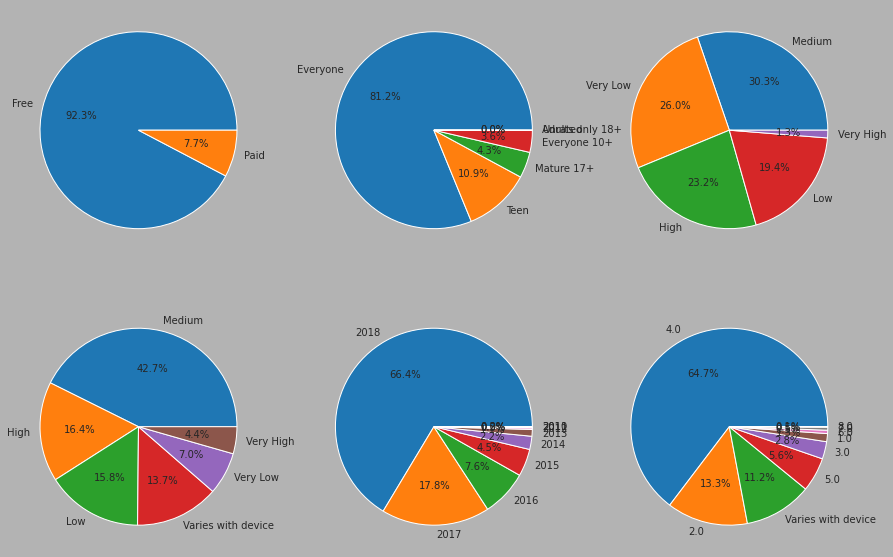

In [380]:
# Count of app in all other category
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct)
        return my_format

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type
s = df1['Type'].value_counts()
ax1.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Content Rating'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Review Category'].value_counts()
ax3.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Size Category'].value_counts()
ax4.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Update_Year'].value_counts()
ax5.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = df1['Android Ver2'].value_counts()
ax6.pie(s,labels = s.index, autopct=autopct_format(s))

plt.gcf().set_facecolor('#c7d1d1')

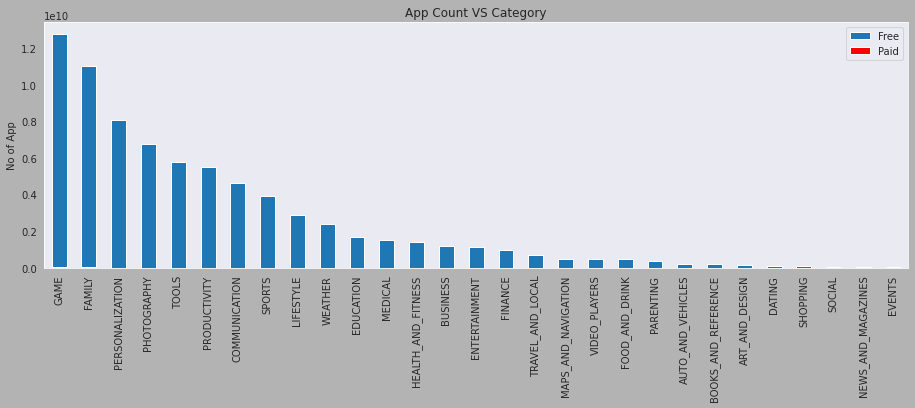

In [381]:
# App Category with heighest number of installations
# Sum of Installation vs category
Cat_Vs_Count=df1.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Count.sort_values('Installs',ascending=False,inplace=True)

final_df2=df1[df1['Type']=='Paid']
Cat_Vs_Count2=final_df2.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Count2.sort_values('Installs',ascending=False,inplace=True)

# Fixing subplot frames
ax1 = plt.subplot2grid(shape=(3, 2), loc=(0, 0), colspan=2)

# Adjusting subplot windows
plt.subplots_adjust(left=0.00,
                    bottom=0.00,
                    right=1,
                    top=1,
                    wspace=.1,
                    hspace=.7)

#Plotting
Cat_Vs_Count.plot.bar(x='Category', y='Installs', rot=90, ax=ax1, figsize=(12,15))
Cat_Vs_Count2.plot.bar(x='Category', y='Installs', rot=90, ax=ax1, color='r')
ax1.set_ylabel('No of App')
ax1.set_xlabel('')
ax1.set_title('App Count VS Category')
ax1.legend(['Free', 'Paid'])

plt.gcf().set_facecolor('#c7d1d1')

' From graph we conclude that most 60% of the paid app in the category is heigher \nin rating then its free counter parts. Although average is biased towards free app rating\nthis can be mainly attributed towards large number of users of free apps insted of paid \napps. '

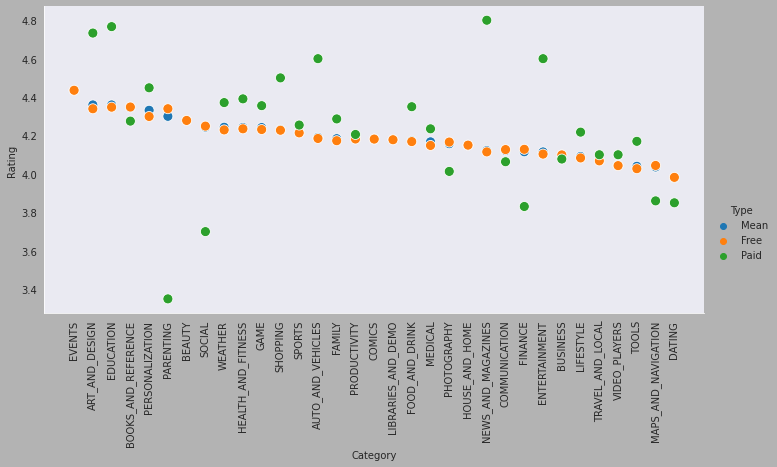

In [382]:
# Visualising average rating vs type in each category

Cat_Vs_Rating1=df1.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
Cat_Vs_Rating1.sort_values('Rating',ascending=False,inplace=True)
Cat_Vs_Rating1['Type']="Mean"
Cat_Vs_Rating2=df1.groupby(['Category', 'Type'], as_index=False).agg({'Rating':'mean'})

Cat_Vs_Rating=pd.concat([Cat_Vs_Rating1,Cat_Vs_Rating2], axis=0)

sns.relplot(
    data=Cat_Vs_Rating,
    x="Category", y="Rating", hue="Type", height=5, aspect=2, s=100)
plt.xticks(rotation=90)

plt.gcf().set_facecolor('#c7d1d1')

""" From graph we conclude that most 60% of the paid app in the category is heigher 
in rating then its free counter parts. Although average is biased towards free app rating
this can be mainly attributed towards large number of users of free apps insted of paid 
apps. """

In [326]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

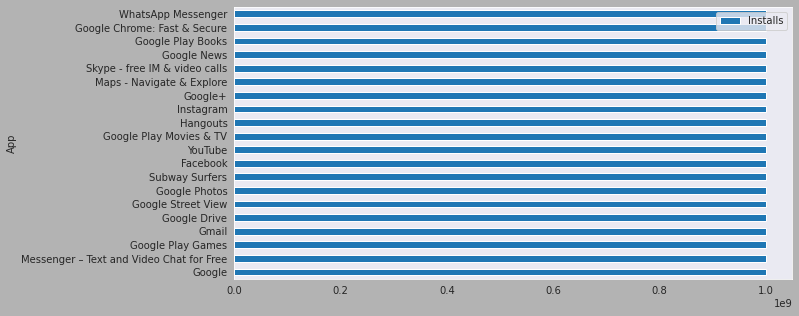

In [383]:
# Top Installed Apps
Top_Installed_App=df1.sort_values('Installs')
Top_Installed_App.tail(20).plot.barh(x='App', y='Installs', figsize=(10,5))

plt.gcf().set_facecolor('#c7d1d1')

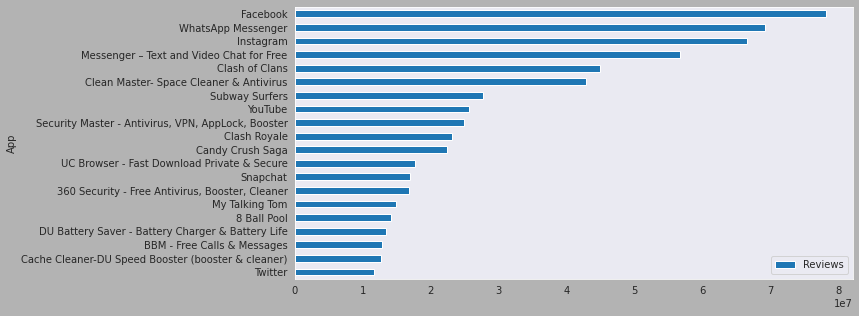

In [384]:
# Top Reviewed Apps
Top_Reviewed_App=df1.sort_values('Reviews')
Top_Reviewed_App.tail(20).plot.barh(x='App', y='Reviews', figsize=(10,5))

plt.gcf().set_facecolor('#c7d1d1')

In [329]:
# Analysing paid app

In [330]:
# Paid app data frame
Paid_App=df1[df1['Type']=='Paid']

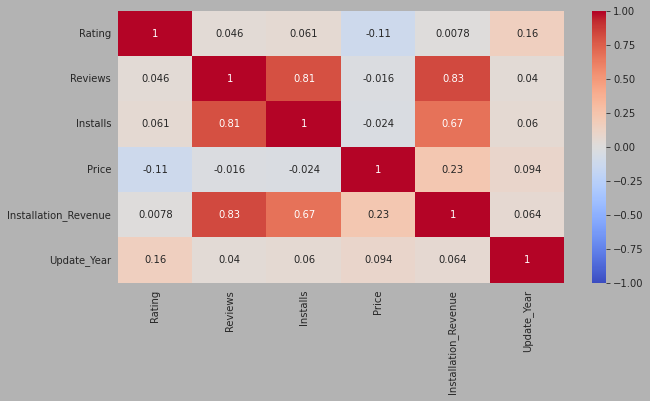

In [385]:
# Correlation between various paid app variables
corr_df = Paid_App.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_df,vmin=-1, cmap='coolwarm', annot=True)

plt.gcf().set_facecolor('#c7d1d1')

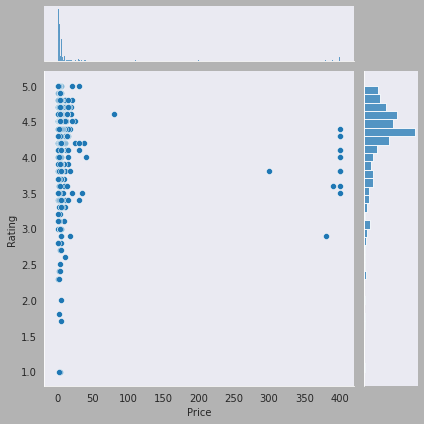

In [386]:
# Scatter plot of ratinng Vs Price. There will be no direct relation as shown in correlation heatmap, but with joint plot we can picturise there distribution
sns.jointplot(x='Price', y='Rating', data=Paid_App)

plt.gcf().set_facecolor('#c7d1d1')

In [333]:
Paid_App['Price'].unique()

array([  0.99,  19.99,   4.99,  29.99,   2.99,   1.99,   3.99,   1.49,
         3.04,   1.75,   6.99,   2.5 ,   9.99,   2.49,  10.  ,   3.49,
         4.49,  14.99,  19.4 ,   3.9 ,   2.59,   5.99,   7.49,  15.99,
        79.99,   5.49,   3.88,  17.99,  18.99,   7.99,   4.29,  12.99,
        14.  ,   2.95,   1.97,   1.  ,  24.99,  11.99,   1.59,   1.76,
       399.99,   1.7 ,  16.99,   3.08,   2.  ,   8.99,  13.99,   1.2 ,
         2.9 ,  37.99,   1.5 ,   1.61,   9.  ,   3.02,   4.84,   1.29,
        39.99,   3.28, 299.99,   3.95,   4.77,   8.49, 389.99,  10.99,
       400.  ,  33.99,   6.49,   2.56,  15.46,   4.6 , 379.99,   4.59,
        25.99, 109.99, 154.99,   1.96,  28.99, 200.  ,  30.99,   3.61,
       394.99,   1.04])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


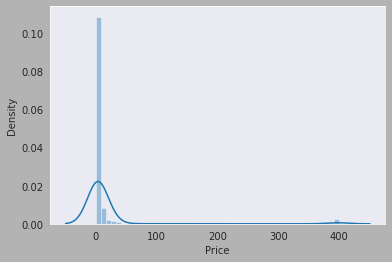

In [387]:
# Number of app agains price range
Paid_App_Price=Paid_App['Price']
sns.distplot(Paid_App_Price, hist=True)

plt.gcf().set_facecolor('#c7d1d1')

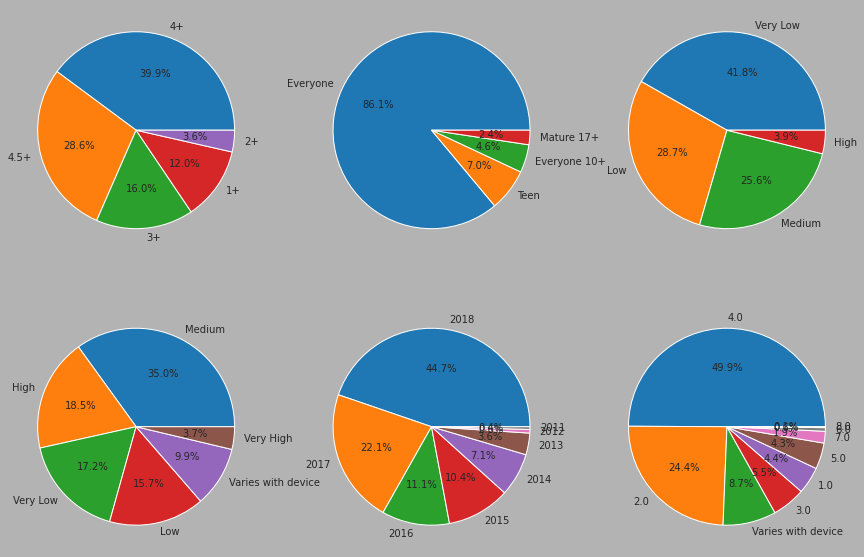

In [388]:
# Various categorical division of Paid App

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type
s = Paid_App['Rating Category'].value_counts()
ax1.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Content Rating'].value_counts()
ax2.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Review Category'].value_counts()
ax3.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Size Category'].value_counts()
ax4.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Update_Year'].value_counts()
ax5.pie(s,labels = s.index, autopct=autopct_format(s))

#Ploting App_count Vs Type
s = Paid_App['Android Ver2'].value_counts()
ax6.pie(s,labels = s.index, autopct=autopct_format(s))

plt.gcf().set_facecolor('#c7d1d1')

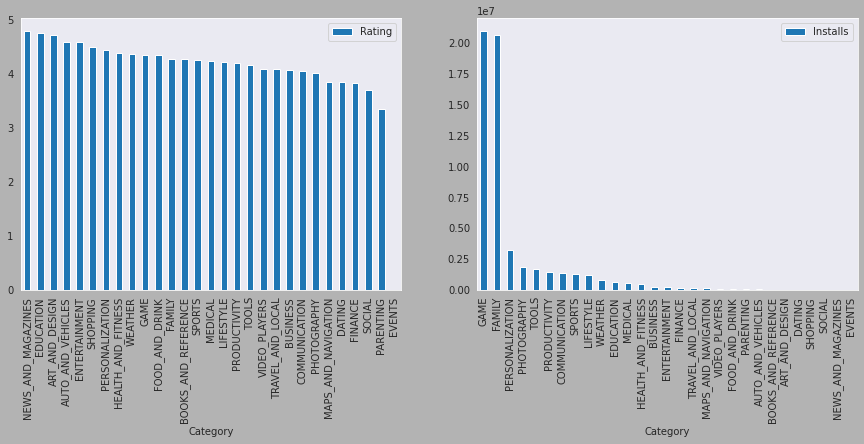

In [389]:
# Top paid app cattegory with heighest rating and installation

plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

App_Vs_Rating1=Paid_App.groupby(['Category'], as_index=False).agg({'Rating':'mean'})
App_Vs_Rating1.sort_values('Rating',ascending=False,inplace=True)

Cat_Vs_Installation1=Paid_App.groupby(['Category'], as_index=False).agg({'Installs':'sum'})
Cat_Vs_Installation1.sort_values('Installs',ascending=False,inplace=True)

#Plotting
App_Vs_Rating1.plot.bar(x='Category', y='Rating', rot=90, ax=ax1, figsize=(15,5))

Cat_Vs_Installation1.plot.bar(x='Category', y='Installs', rot=90, ax=ax2, figsize=(15,5))

plt.gcf().set_facecolor('#c7d1d1')


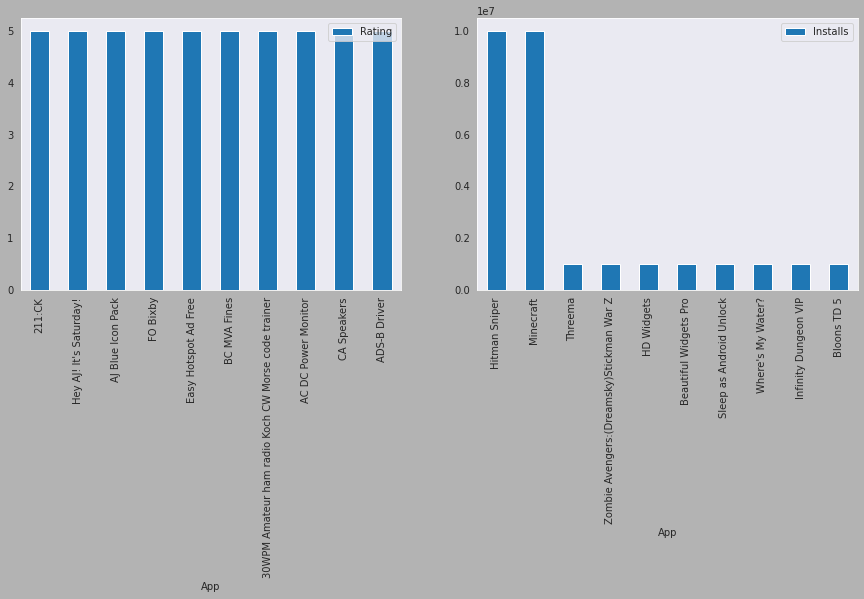

In [390]:
# Top paid apps with heighest rating an installation
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

App_Vs_Rating1=Paid_App.sort_values('Rating',ascending=False).head(10)

App_Vs_Installation1=Paid_App.sort_values('Installs',ascending=False).head(10)

#Plotting
App_Vs_Rating1.plot.bar(x='App', y='Rating', rot=90, ax=ax1, figsize=(15,5))

App_Vs_Installation1.plot.bar(x='App', y='Installs', rot=90, ax=ax2, figsize=(15,5))

plt.gcf().set_facecolor('#c7d1d1')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set

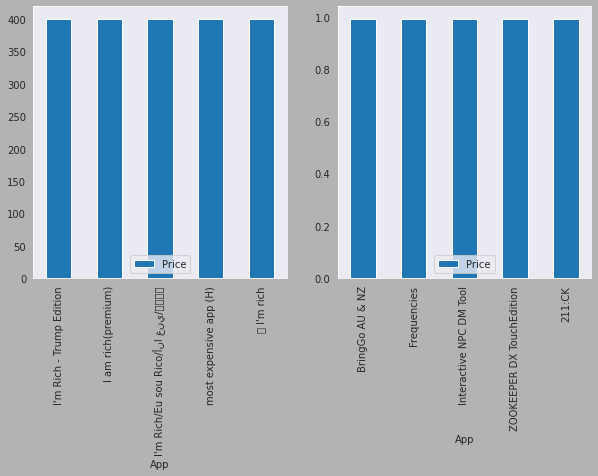

In [391]:
# Top5 Heighest priced App and Lowest priced app
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

Top_HP_App=Paid_App.sort_values('Price',ascending=False)

#Plotting
Top_HP_App.head(5).plot.bar(x='App', y='Price', rot=90, ax=ax1, figsize=(10,5))

Top_HP_App.tail(5).plot.bar(x='App', y='Price', rot=90, ax=ax2, figsize=(10,5))

plt.gcf().set_facecolor('#c7d1d1')

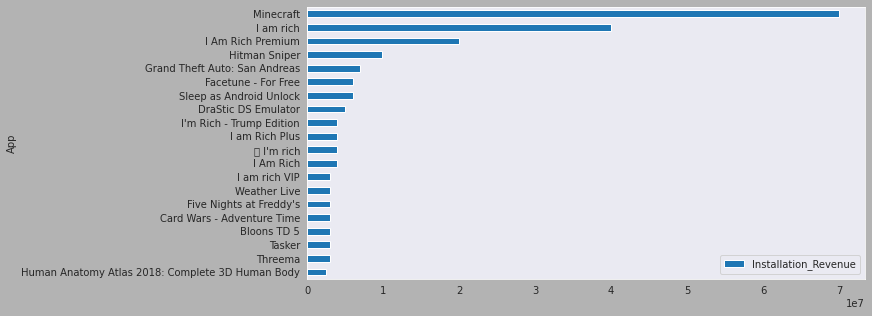

In [392]:
# Top Apps with highest revenue based on installation (As it is not necessory that app with heighest price will yield highest revenue)
Revenue=Paid_App.sort_values('Installation_Revenue')
Revenue.tail(20).plot.barh(x='App', y='Installation_Revenue', figsize=(10,5))

plt.gcf().set_facecolor('#c7d1d1')


In [340]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Android Ver2', 'Prime_Genres', 'Installation_Revenue',
       'Review Category', 'Size Category', 'Rating Category', 'Update_Month',
       'Update_Year'],
      dtype='object')

In [341]:
''' Review Analysis '''

' Review Analysis '

In [342]:
df3.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Android Ver2', 'Prime_Genres',
       'Installation_Revenue', 'Review Category', 'Size Category',
       'Rating Category', 'Update_Month', 'Update_Year'],
      dtype='object')

In [343]:
df3['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

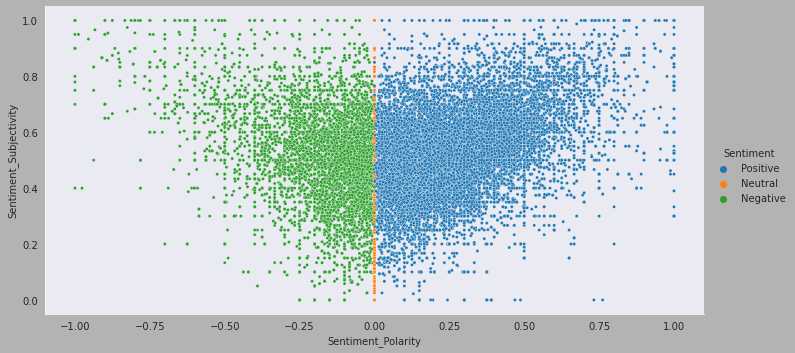

In [366]:
# Cheking relationship between Sentiment, Sentiment_Polarity and Subjectivity by using scatter plot
# From corelation we have seen that Sentiment is not corelated with any other variables
sns.relplot(
    data=df3,
    x='Sentiment_Polarity', y='Sentiment_Subjectivity', hue='Sentiment', height=5, aspect=2, s=10)

plt.gcf().set_facecolor('#c7d1d1')

In [345]:
df3.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Android Ver2', 'Prime_Genres',
       'Installation_Revenue', 'Review Category', 'Size Category',
       'Rating Category', 'Update_Month', 'Update_Year'],
      dtype='object')

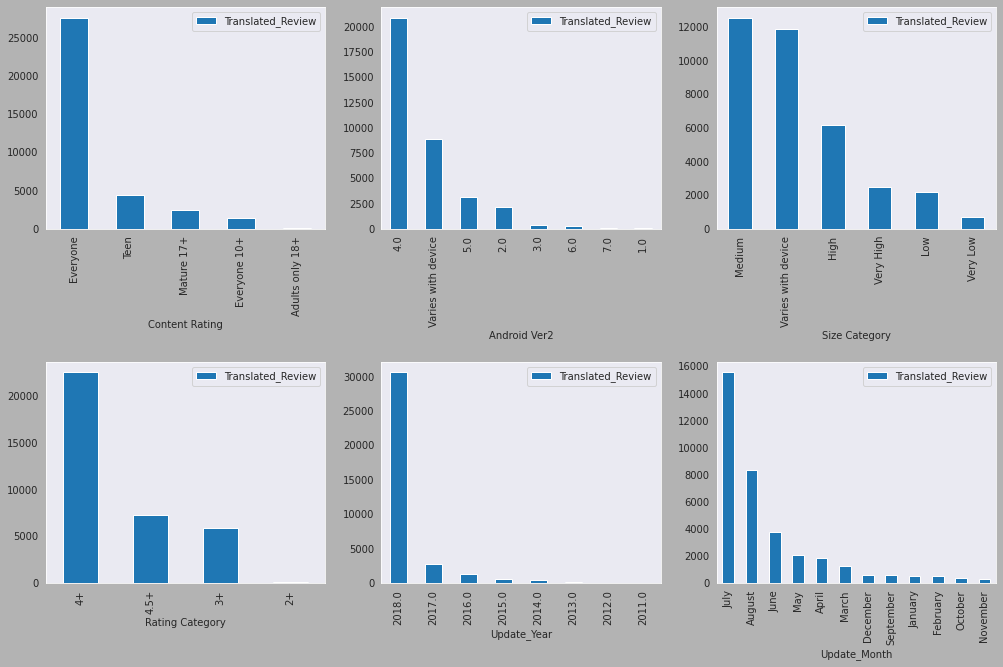

In [365]:
sns.set_style("dark")

# Checking number of reviews and its distribution in each category
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(2, 3), loc=(0, 1))
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2))
ax4 = plt.subplot2grid(shape=(2, 3), loc=(1, 0))
ax5 = plt.subplot2grid(shape=(2, 3), loc=(1, 1))
ax6 = plt.subplot2grid(shape=(2, 3), loc=(1, 2))

#Ploting App_count Vs Type

s=df3.groupby(['Content Rating'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Content Rating', y='Translated_Review', ax=ax1)

s=df3.groupby(['Android Ver2'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Android Ver2', y='Translated_Review', ax=ax2)

s=df3.groupby(['Size Category'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Size Category', y='Translated_Review', ax=ax3)

s=df3.groupby(['Rating Category'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Rating Category', y='Translated_Review', ax=ax4)

s=df3.groupby(['Update_Year'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Update_Year', y='Translated_Review', ax=ax5)

s=df3.groupby(['Update_Month'], as_index=False).agg({'Translated_Review':'count'}).sort_values('Translated_Review',ascending=False)
s.plot.bar(x='Update_Month', y='Translated_Review', ax=ax6)

# To adjust subplot properties
plt.subplots_adjust(left=0.02,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=.2,
                    hspace=.6)

plt.gcf().set_facecolor('#c7d1d1')

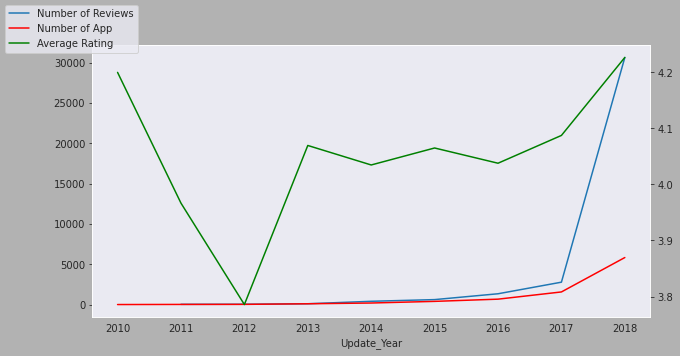

In [394]:
''' It is evident from above analysis that number of reviews has increased year by year. 
Let us check what was the trend of average rating Vs App count Vs Review by year on year. '''

#Number of written review records
df_Y1=df3.groupby(['Update_Year'], as_index=False).agg({'Translated_Review':'count'})
df_Y1['Category2']='Total_Trans_Review'
df_Y1.rename(columns={'Translated_Review':'Value'}, inplace=True)

#Number of Apps updated in the Year
df_Y2=df1.groupby(['Update_Year'], as_index=False).agg({'App':'count'})
df_Y2['Category2']='App_Count'
df_Y2.rename(columns={'App':'Value'}, inplace=True)

#Number of Apps Average Rating in the Year
df_Y3=df1.groupby(['Update_Year'], as_index=False).agg({'Rating':'mean'})
df_Y3['Category2']='Average_Rating'
df_Y3.rename(columns={'Rating':'Value'}, inplace=True)

# Ploting data
ax = df_Y1.plot('Update_Year', legend=False, figsize=(10, 5))
df_Y2.plot(x='Update_Year', ax=ax, legend=False, color="r")
ax3 = ax.twinx()
df_Y3.plot(x='Update_Year', ax=ax3, legend=False, color="g")
ax.figure.legend(loc='upper left', labels=['Number of Reviews', 'Number of App', 'Average Rating'])

plt.gcf().set_facecolor('#c7d1d1')